In [ ]:
# Import numpy library
pip install numpy

In [ ]:
# Import matplot library
pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

2D Linear Regression

y=4.92x+(-16.65)


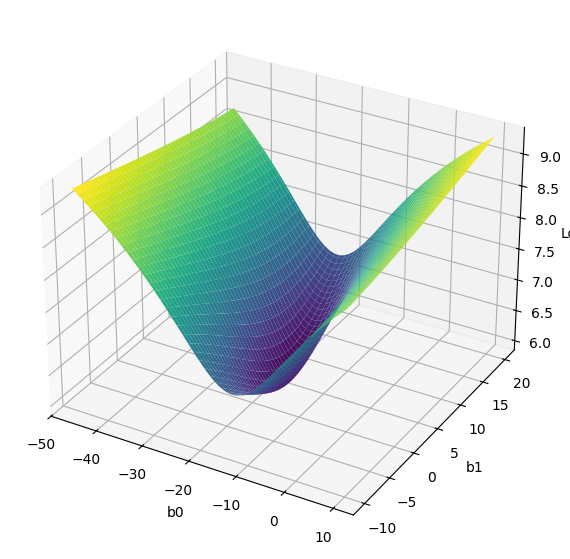

In [3]:
# Initilize and generate random data
n=1000
x=np.random.normal(3,5,size=n)
y=5*x-18.0+np.random.normal(0,20,size=n)

# Analytical approch to solving linear regression  
sumOfX=np.sum(x)
sumOfY=np.sum(y)
b1=(n*np.dot(x,y)-sumOfY*sumOfX)/(n*np.dot(x,x)-sumOfX**2)
b0=(sumOfY-b1*sumOfX)/n
b1,b0=round(b1,2),round(b0,2)
print(f"y={b1}x+({b0})")

# Test analytical answer by numeric and drowing method

# Mean squared error (MSE) function
def MSE(b0,b1,x,y):
    pred=b0+b1*x
    loss=np.sum((pred-y)**2)/len(x)
    return loss
# Generate a grid of b0 and b1 values around the up real answers(b0=-18,b1=5)
b0Value=np.linspace(-46,10,100)
b1Value=np.linspace(-10,20,100)
Z=np.zeros((len(b0Value),len(b1Value)))

# Calculate MSE loss for each point of this grid
# Log-scale is only for better visualization
for i in range(len(b0Value)):
    for j in range(len(b1Value)):
        Z[i,j]=np.log(MSE(b0Value[i],b1Value[j],x,y))

# 3D plot of MSE loss in log-Scale
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
B0,B1=np.meshgrid(b0Value,b1Value)
ax.plot_surface(B0,B1,Z,cmap='viridis')

# Adding labels
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel( 'Loss')
plt.show()

General Analytical 2D dimensions Linear Regression by Closed-Form 

y= -6.38+(3.01)x


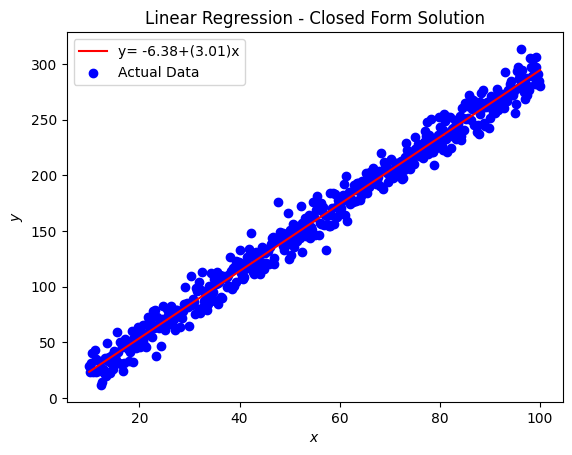

In [37]:
# Generation Data by a noisy Function
def generateData(n=50,noise=10.0):
    np.random.seed(42)
    X=np.linspace(10,100,n)
    # supposed line equation : y = 3x - 6
    slope = 3
    origineWidth= -6
    noiseValue=np.random.randn(n) * noise
    Y=slope*X + origineWidth + noiseValue
    return X,Y


# Initialize X and Y Arrays
X,Y=generateData(500,10)

# Closed-Form Solution
def h_w(x,w):
    return w[0] + w[1]*x


def linearRegressionClosedForm(x,y):
    X_b=np.c_[np.ones((len(x),1)),x]#create a new array by one matrix and X matrix
    W=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)    
    return W
w=linearRegressionClosedForm(X,Y)
print(f"y= {w[0]:.2f}+({w[1]:.2f})x")


# Predicted Value
y_pred=h_w(X,w)
y_pred_title= f"y= {w[0]:.2f}+({w[1]:.2f})x"

plt.plot(X, y_pred, color='red', label=y_pred_title)
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()
